In [1]:
#import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set(style="ticks")
import gc
import itertools
from datetime import datetime
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.simplefilter("ignore")
pd.set_option('display.max_columns', 100)
np.random.seed(42)
import plotly
from datetime import datetime, timedelta
import plotly.offline as pyoff
import plotly.graph_objs as go
#initiate visualization library for jupyter notebook 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
pyoff.init_notebook_mode(connected=True)
%matplotlib inline

In [2]:
#defining visualizaition functions
def format_spines(ax, right_border=True):
    
    ax.spines['bottom'].set_color('#666666')
    ax.spines['left'].set_color('#666666')
    ax.spines['top'].set_visible(False)
    if right_border:
        ax.spines['right'].set_color('#FFFFFF')
    else:
        ax.spines['right'].set_color('#FFFFFF')
    ax.patch.set_facecolor('#FFFFFF')
    

def count_plot(feature, df, colors='Blues_d', hue=False, ax=None, title=''):
    # Preparing variables
    ncount = len(df)
    if hue != False:
        ax = sns.countplot(x=feature, data=df, palette=colors, hue=hue, ax=ax)
    else:
        ax = sns.countplot(x=feature, data=df, palette=colors, ax=ax)
        
    format_spines(ax)

    # Setting percentage
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text
        
    # Final configuration
    if not hue:
        ax.set_title(df[feature].describe().name + ' Analysis', size=13, pad=15)
    else:
        ax.set_title(df[feature].describe().name + ' Analysis by ' + hue, size=13, pad=15)  
    if title != '':
        ax.set_title(title)       
    plt.tight_layout()
    
    
def bar_plot(x, y, df, colors='Blues_d', hue=False, ax=None, value=False, title=''):
     
    # Preparing variables
    try:
        ncount = sum(df[y])
    except:
        ncount = sum(df[x])
    #fig, ax = plt.subplots()
    if hue != False:
        ax = sns.barplot(x=x, y=y, data=df, palette=colors, hue=hue, ax=ax, ci=None)
    else:
        ax = sns.barplot(x=x, y=y, data=df, palette=colors, ax=ax, ci=None)

    # Setting borders
    format_spines(ax)

    # Setting percentage
    for p in ax.patches:
        xp=p.get_bbox().get_points()[:,0]
        yp=p.get_bbox().get_points()[1,1]
        if value:
            ax.annotate('{:.2f}k'.format(yp/1000), (xp.mean(), yp), 
                    ha='center', va='bottom') # set the alignment of the text
        else:
            ax.annotate('{:.1f}%'.format(100.*yp/ncount), (xp.mean(), yp), 
                    ha='center', va='bottom') # set the alignment of the text
    if not hue:
        ax.set_title(df[x].describe().name + ' Analysis', size=12, pad=15)
    else:
        ax.set_title(df[x].describe().name + ' Analysis by ' + hue, size=12, pad=15)
    if title != '':
        ax.set_title(title)  
    plt.tight_layout()


In [4]:
# loading data 
customers_ = pd.read_csv("olistpreprocesseddata/olistpre1/olist_customers_dataset_new.csv")
order_items_ = pd.read_csv("olistpreprocesseddata/olistpre1/olist_order_items_dataset_new.csv")
order_payments_ = pd.read_csv("olistpreprocesseddata/olistpre1/olist_order_payments_dataset_new.csv")
orders_ = pd.read_csv("olistpreprocesseddata/olistpre1/olist_orders_dataset_new.csv")

In [5]:
customers_

customer_id customer_unique_id                      customer_id3  \
0            66156             C33212  06b8999e2fba1a1fbc88172c00ba8bc7   
1            27568             C37191  18955e83d337fd6b2def6b18a428ac77   
2            17518             C03781  4e7b3e00288586ebd08712fdd0374a03   
3             2613             C53477  b2b6027bc5c5109e529d4dc6358b12c3   
4            62703             C09832  4f2d8ab171c80ec8364f7c12e35b23ad   
...            ...                ...                               ...   
99436        31321             C41138  17ddf5dd5d51696bb3d7c6291687be6f   
99437        63405             C41627  e7b71a9017aa05c9a7fd292d714858e8   
99438         7043             C85400  5e28dfe12db7fb50a4b2f691faecea5e   
99439        15520             C04965  56b18e2166679b8a959d72dd06da27f9   
99440        75568             C49974  274fa6071e5e17fe303b9748641082c8   

                   customer_unique_id_3  customer_zip_code_prefix  \
0      861eff4711a542e4b93843c6dd7febb0                     14409   
1      290c77bc529b7ac935b93aa66c333dc3                      9790   
2      060e732b5b29e8181a18229c7b0b2b5e                      1151   
3      259dac757896d24d7702b9acbbff3f3c                      8775   
4      345ecd01c38d18a9036ed96c73b8d066                     13056   
...                                 ...                       ...   
99436  1a29b476fee25c95fbafc67c5ac95cf8                      3937   
99437  d52a67c98be1cf6a5c84435bd38d095d                      6764   
99438  e9f50caf99f032f0bf3c55141f019d99                     60115   
99439  73c2643a0a458b49f58cea58833b192e                     92120   
99440  84732c5050c01db9b23e19ba39899398                      6703   

               customer_city customer_state  
0                     franca             SP  
1      sao bernardo do campo             SP  
2                  sao paulo             SP  
3            mogi das cruzes             SP  
4                   campinas             SP  
...                      ...            ...  
99436              sao paulo             SP  
99437        taboao da serra             SP  
99438              fortaleza             CE  
99439                 canoas             RS  
99440                  cotia             SP  

[99441 rows x 7 columns]

In [6]:
orders_

customer_id                      customer_id3 order_id  \
0            66156  06b8999e2fba1a1fbc88172c00ba8bc7  ON95945   
1            27568  18955e83d337fd6b2def6b18a428ac77  ON56075   
2            17518  4e7b3e00288586ebd08712fdd0374a03  ON66512   
3             2613  b2b6027bc5c5109e529d4dc6358b12c3  ON79913   
4            62703  4f2d8ab171c80ec8364f7c12e35b23ad  ON00870   
...            ...                               ...      ...   
99436        31321  17ddf5dd5d51696bb3d7c6291687be6f  ON23820   
99437        63405  e7b71a9017aa05c9a7fd292d714858e8  ON18022   
99438         7043  5e28dfe12db7fb50a4b2f691faecea5e  ON64589   
99439        15520  56b18e2166679b8a959d72dd06da27f9  ON62932   
99440        75568  274fa6071e5e17fe303b9748641082c8  ON16888   

                              order_id3 order_status order_purchase_timestamp  \
0      00e7ee1b050b8499577073aeb2a297a1    delivered      2017-05-16 15:05:35   
1      29150127e6685892b6eab3eec79f59c7    delivered      2018-01-12 20:48:24   
2      b2059ed67ce144a36e2aa97d2c9e9ad2    delivered      2018-05-19 16:07:45   
3      951670f92359f4fe4a63112aa7306eba    delivered      2018-03-13 16:06:38   
4      6b7d50bd145f6fc7f33cebabd7e49d0f    delivered      2018-07-29 09:51:30   
...                                 ...          ...                      ...   
99436  6760e20addcf0121e9d58f2f1ff14298    delivered      2018-04-07 15:48:17   
99437  9ec0c8947d973db4f4e8dcf1fbfa8f1b    delivered      2018-04-04 08:20:22   
99438  fed4434add09a6f332ea398efd656a5c    delivered      2018-04-08 20:11:50   
99439  e31ec91cea1ecf97797787471f98a8c2    delivered      2017-11-03 21:08:33   
99440  28db69209a75e59f20ccbb5c36a20b90    delivered      2017-12-19 14:27:23   

         order_approved_at order_delivered_carrier_date  \
0      2017-05-16 15:22:12          2017-05-23 10:47:57   
1      2018-01-12 20:58:32          2018-01-15 17:14:59   
2      2018-05-20 16:19:10          2018-06-11 14:31:00   
3      2018-03-13 17:29:19          2018-03-27 23:22:42   
4      2018-07-29 10:10:09          2018-07-30 15:16:00   
...                    ...                          ...   
99436  2018-04-07 16:08:45          2018-04-11 02:08:36   
99437  2018-04-04 08:35:12          2018-04-05 18:42:35   
99438  2018-04-08 20:30:03          2018-04-09 17:52:17   
99439  2017-11-03 21:31:20          2017-11-06 18:24:41   
99440  2017-12-19 18:50:39          2017-12-21 19:17:21   

      order_delivered_customer_date order_estimated_delivery_date  
0               2017-05-25 10:35:35           2017-06-05 00:00:00  
1               2018-01-29 12:41:19           2018-02-06 00:00:00  
2               2018-06-14 17:58:51           2018-06-13 00:00:00  
3               2018-03-28 16:04:25           2018-04-10 00:00:00  
4               2018-08-09 20:55:48           2018-08-15 00:00:00  
...                             ...                           ...  
99436           2018-04-13 20:06:37           2018-04-25 00:00:00  
99437           2018-04-11 18:54:45           2018-04-20 00:00:00  
99438           2018-05-09 19:03:15           2018-05-02 00:00:00  
99439           2017-11-16 19:58:39           2017-12-05 00:00:00  
99440           2017-12-26 18:42:36           2018-01-08 00:00:00  

[99441 rows x 10 columns]

In [7]:
order_items_

seller_id                        seller_id3 order_id  \
0          S1347  3442f8959a84dea7ee197c632cb2df15  ON52911   
1          S1347  3442f8959a84dea7ee197c632cb2df15  ON47598   
2          S1347  3442f8959a84dea7ee197c632cb2df15  ON69627   
3          S1589  d1b65fc7debc3361ea86b5f14c68d2e2  ON44120   
4          S1589  d1b65fc7debc3361ea86b5f14c68d2e2  ON06864   
...          ...                               ...      ...   
112645     S1016  e603cf3fec55f8697c9059638d6c8eb5  ON59939   
112646     S1016  e603cf3fec55f8697c9059638d6c8eb5  ON11311   
112647     S1016  e603cf3fec55f8697c9059638d6c8eb5  ON17064   
112648     S1016  e603cf3fec55f8697c9059638d6c8eb5  ON41775   
112649     S0548  9e25199f6ef7e7c347120ff175652c3b  ON52931   

                               order_id3  order_item_id product_id  \
0       4a90af3e85dd563884e2afeab1091394              1     P29061   
1       bc8a5de6abf5b14f98a6135a7fb46731              2     P31368   
2       6d953888a914b67350d5bc4d48f2acab              1     P32849   
3       7a95f5626df09176d8823cbce3d9db1e              1     P31854   
4       06e4e324b83309e575442446e34377d7              1     P02561   
...                                  ...            ...        ...   
112645  1ad1ca4550bd6dbd299d8538a86e5400              1     P17272   
112646  683076b91bcaf79259334f6aa80d41a3              1     P17272   
112647  aae373a2cc64ed2d1f262aa56e70b7e8              1     P17272   
112648  d1edb80f6670902ebbb11765b96873da              1     P17272   
112649  f7b6b85f6fd2cf9aac15731dca998844              1     P20591   

                            product_id_3  shipping_limit_date  price  \
0       ffb64e34a37740dafb6c88f1abd1fa61  2017-08-25 20:50:19  106.2   
1       325a06bcce0da45b7f4ecf2797dd40e4  2017-09-05 12:50:19   10.8   
2       f4621f8ad6f54a2e3c408884068be46d  2017-05-11 16:25:11  101.7   
3       55103cbbe0851d3a303a022cc4140628  2017-08-17 23:30:18  199.9   
4       1c36a5285f7f3b1ed2637d7c528ce5ff  2017-06-30 02:25:24   99.9   
...                                  ...                  ...    ...   
112645  e891d4a9622cae3b9fc2ec558bda155b  2017-04-10 10:05:10   27.0   
112646  e891d4a9622cae3b9fc2ec558bda155b  2017-02-13 11:32:53   27.0   
112647  e891d4a9622cae3b9fc2ec558bda155b  2017-02-15 16:42:59   27.0   
112648  e891d4a9622cae3b9fc2ec558bda155b  2017-06-26 17:30:16   27.0   
112649  179bb56045bec397c52ef3c8183dabb6  2017-03-31 10:10:27   12.5   

        freight_value  
0                9.56  
1                2.42  
2               15.92  
3               23.40  
4               22.70  
...               ...  
112645          16.05  
112646          16.05  
112647          10.96  
112648          12.48  
112649          14.52  

[112650 rows x 10 columns]

In [8]:
# displaying data shape
#dataset = [customers, geolocation, order_items, order_payments, order_reviews, orders, products, sellers, category_name_translation]
dataset = {
    'Customers': customers_,
    'Order Items': order_items_,
    'Payments': order_payments_,
    'Orders': orders_
}

for x, y in dataset.items():
    print(f'{x}', (list(y.shape)))

Customers [99441, 7]
Order Items [112650, 10]
Payments [103886, 6]
Orders [99441, 10]


In [9]:
# displaying dataset column names
for x, y in dataset.items():
    print(f'{x}', f'{list(y.columns)}\n')


Customers ['customer_id', 'customer_unique_id', 'customer_id3', 'customer_unique_id_3', 'customer_zip_code_prefix', 'customer_city', 'customer_state']

Order Items ['seller_id', 'seller_id3', 'order_id', 'order_id3', 'order_item_id', 'product_id', 'product_id_3', 'shipping_limit_date', 'price', 'freight_value']

Payments ['order_id', 'order_id3', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value']

Orders ['customer_id', 'customer_id3', 'order_id', 'order_id3', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']



In [10]:
# checking for null values in datasets
for x, y in dataset.items():
    print(f'{x}: {y.isnull().any().any()}')

Customers: False
Order Items: False
Payments: False
Orders: True


In [11]:
# taking count for dataset with missing values
for x, y in dataset.items():
    if y.isnull().any().any():
        print(f'{x}', (list(y.shape)),'\n')
        print(f'{y.isnull().sum()}\n')

Orders [99441, 10] 

customer_id                         0
customer_id3                        0
order_id                            0
order_id3                           0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64



In [12]:
# creating master dataframe for analysis purposes
order_payments_.head()
df1 = order_payments_.merge(order_items_, on='order_id')
df2 = df1.merge(orders_, on='order_id')
df = df2.merge(customers_, on='customer_id')
print(df.shape)


(117601, 30)


In [13]:
df

order_id                       order_id3_x  payment_sequential  \
0       ON34305  e481f51cbdc54678b7cc49136f2d6af7                   1   
1       ON34305  e481f51cbdc54678b7cc49136f2d6af7                   3   
2       ON34305  e481f51cbdc54678b7cc49136f2d6af7                   2   
3       ON12238  53cdb2fc8bc7dce0b6741e2150273451                   1   
4       ON21442  47770eb9100c2d0c44946d9cf07ec65d                   1   
...         ...                               ...                 ...   
117596  ON21623  63943bddc261676b46f01ca7ac2f7bd8                   1   
117597  ON26513  83c1379a015df1e13d02aae0204711ab                   1   
117598  ON14010  11c177c8e97725db2631073c19f07b62                   1   
117599  ON14010  11c177c8e97725db2631073c19f07b62                   1   
117600  ON29969  66dea50a8b16d9b4dee7af250b4be1a5                   1   

       payment_type  payment_installments  payment_value seller_id  \
0       credit_card                     1          18.12     S2121   
1           voucher                     1           2.00     S2121   
2           voucher                     1          18.59     S2121   
3            boleto                     1         141.46     S2662   
4       credit_card                     3         179.12     S0124   
...             ...                   ...            ...       ...   
117596  credit_card                     3         195.00     S2134   
117597  credit_card                     5         271.01     S2600   
117598  credit_card                     4         441.16     S1894   
117599  credit_card                     4         441.16     S1894   
117600   debit_card                     1          86.86     S2459   

                              seller_id3                       order_id3_y  \
0       3504c0cb71d7fa48d967e0e4c94d59d9  e481f51cbdc54678b7cc49136f2d6af7   
1       3504c0cb71d7fa48d967e0e4c94d59d9  e481f51cbdc54678b7cc49136f2d6af7   
2       3504c0cb71d7fa48d967e0e4c94d59d9  e481f51cbdc54678b7cc49136f2d6af7   
3       289cdb325fb7e7f891c38608bf9e0962  53cdb2fc8bc7dce0b6741e2150273451   
4       4869f7a5dfa277a7dca6462dcf3b52b2  47770eb9100c2d0c44946d9cf07ec65d   
...                                  ...                               ...   
117596  1f9ab4708f3056ede07124aad39a2554  63943bddc261676b46f01ca7ac2f7bd8   
117597  d50d79cb34e38265a8649c383dcffd48  83c1379a015df1e13d02aae0204711ab   
117598  a1043bafd471dff536d0c462352beb48  11c177c8e97725db2631073c19f07b62   
117599  a1043bafd471dff536d0c462352beb48  11c177c8e97725db2631073c19f07b62   
117600  ececbfcff9804a2d6b40f589df8eef2b  66dea50a8b16d9b4dee7af250b4be1a5   

        order_item_id product_id                      product_id_3  \
0                   1     P23526  87285b34884572647811a353c7ac498a   
1                   1     P23526  87285b34884572647811a353c7ac498a   
2                   1     P23526  87285b34884572647811a353c7ac498a   
3                   1     P05896  595fac2a385ac33a80bd5114aec74eb8   
4                   1     P28870  aa4383b373c6aca5d8797843e5594415   
...               ...        ...                               ...   
117596              1     P32384  f1d4ce8c6dd66c47bbaa8c6781c2a923   
117597              1     P21797  b80910977a37536adeddd63663f916ad   
117598              1     P02786  d1c427060a0f73f6b889a5c7c61f2ac4   
117599              2     P02786  d1c427060a0f73f6b889a5c7c61f2ac4   
117600              1     P22048  006619bbed68b000c8ba3f8725d5409e   

        shipping_limit_date   price  freight_value  customer_id  \
0       2017-10-06 11:07:15   29.99           8.72        23005   
1       2017-10-06 11:07:15   29.99           8.72        23005   
2       2017-10-06 11:07:15   29.99           8.72        23005   
3       2018-07-30 03:24:27  118.70          22.76        92079   
4       2018-08-13 08:55:23  159.90          19.22        56486   
...                     ...     ...            ...          ...   
117596  2018-02-12 13:10:37  174.90       

In [14]:
# converting date columns to datetime
date_columns = ['shipping_limit_date', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], format='%Y-%m-%d %H:%M:%S')

In [15]:
# cleaning up name columns
df['customer_city'] = df['customer_city'].str.title()
df['payment_type'] = df['payment_type'].str.replace('_', ' ').str.title()
# engineering new/essential columns
df['delivery_against_estimated'] = (df['order_estimated_delivery_date'] - df['order_delivered_customer_date']).dt.days
df['order_purchase_year'] = df.order_purchase_timestamp.apply(lambda x: x.year)
df['order_purchase_month'] = df.order_purchase_timestamp.apply(lambda x: x.month)
df['order_purchase_dayofweek'] = df.order_purchase_timestamp.apply(lambda x: x.dayofweek)
df['order_purchase_hour'] = df.order_purchase_timestamp.apply(lambda x: x.hour)
df['order_purchase_day'] = df['order_purchase_dayofweek'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})
df['order_purchase_mon'] = df.order_purchase_timestamp.apply(lambda x: x.month).map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
# Changing the month attribute for correct ordenation
df['month_year'] = df['order_purchase_month'].astype(str).apply(lambda x: '0' + x if len(x) == 1 else x)
df['month_year'] = df['order_purchase_year'].astype(str) + '-' + df['month_year'].astype(str)
#creating year month column
df['month_y'] = df['order_purchase_timestamp'].map(lambda date: 100*date.year + date.month)

In [16]:
# displaying summary staticstics of columns
df.describe(include='all')

order_id                       order_id3_x  payment_sequential  \
count    117601                            117601       117601.000000   
unique    98665                             98665                 NaN   
top     ON04812  895ab968e7bb0d5659d16cd74cd1650c                 NaN   
freq         63                                63                 NaN   
first       NaN                               NaN                 NaN   
last        NaN                               NaN                 NaN   
mean        NaN                               NaN            1.093528   
std         NaN                               NaN            0.726692   
min         NaN                               NaN            1.000000   
25%         NaN                               NaN            1.000000   
50%         NaN                               NaN            1.000000   
75%         NaN                               NaN            1.000000   
max         NaN                               NaN           29.000000   

       payment_type  payment_installments  payment_value seller_id  \
count        117601         117601.000000  117601.000000    117601   
unique            4                   NaN            NaN      3095   
top     Credit Card                   NaN            NaN     S2423   
freq          86769                   NaN            NaN      2133   
first           NaN                   NaN            NaN       NaN   
last            NaN                   NaN            NaN       NaN   
mean            NaN              2.939482     172.686752       NaN   
std             NaN              2.774223     267.592290       NaN   
min             NaN              0.000000       0.000000       NaN   
25%             NaN              1.000000      60.870000       NaN   
50%             NaN              2.000000     108.210000       NaN   
75%             NaN              4.000000     189.260000       NaN   
max             NaN             24.000000   13664.080000       NaN   

                              seller_id3                       order_id3_y  \
count                             117601                            117601   
unique                              3095                             98665   
top     4a3ca9315b744ce9f8e9374361493884  895ab968e7bb0d5659d16cd74cd1650c   
freq                                2133                                63   
first                                NaN                               NaN   
last                                 NaN                               NaN   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        order_item_id product_id                      product_id_3  \
count   117601.000000     117601                            117601   
unique            NaN      32951                             32951   
top               NaN     P16646  aca2eb7d00ea1a7b8ebd4e68314663af   
freq              NaN        536                               536   
first             NaN        NaN                               NaN   
last              NaN        NaN                               NaN   
mean         1.195900        NaN                               NaN   
std          0.697706        NaN                               NaN   
min          1.000000        NaN                               NaN   
25%          1.000000        NaN                               NaN   
50%          1.000000        NaN                               NaN   
75%          1.000000        NaN                               NaN   


In [17]:
# displaying missing value counts and corresponding percentage against total observations
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([missing_values, percentage], axis=1, keys=['Values', 'Percentage']).transpose()


order_delivered_customer_date  delivery_against_estimated  \
Values                        2567.000000                 2567.000000   
Percentage                       2.182805                    2.182805   

            order_delivered_carrier_date  order_approved_at  month_y  \
Values                       1245.000000          15.000000      0.0   
Percentage                      1.058664           0.012755      0.0   

            order_item_id  freight_value  price  shipping_limit_date  \
Values                0.0            0.0    0.0                  0.0   
Percentage            0.0            0.0    0.0                  0.0   

            product_id_3  product_id  order_id3_y  customer_id3_x  seller_id3  \
Values               0.0         0.0          0.0             0.0         0.0   
Percentage           0.0         0.0          0.0             0.0         0.0   

            seller_id  payment_value  payment_installments  payment_type  \
Values            0.0            0.0                   0.0           0.0   
Percentage        0.0            0.0                   0.0           0.0   

            payment_sequential  order_id3_x  customer_id  \
Values                     0.0          0.0          0.0   
Percentage                 0.0          0.0          0.0   

            order_purchase_timestamp  order_id3  customer_state  \
Values                           0.0        0.0             0.0   
Percentage                       0.0        0.0             0.0   

            order_purchase_mon  order_purchase_day  order_purchase_hour  \
Values                     0.0                 0.0                  0.0   
Percentage                 0.0                 0.0                  0.0   

            order_purchase_dayofweek  order_purchase_month  \
Values                           0.0                   0.0   
Percentage                       0.0                   0.0   

            order_purchase_year  customer_city  order_status  \
Values                      0.0            0.0           0.0   
Percentage                  0.0            0.0           0.0   

            customer_zip_code_prefix  customer_unique_id_3  customer_id3_y  \
Values                           0.0                   0.0             0.0   
Percentage                       0.0                   0.0             0.0   

            customer_unique_id  order_estimated_delivery_date  month_year  \
Values                     0.0                            0.0         0.0   
Percentage                 0.0                            0.0         0.0   

            order_id  
Values           0.0  
Percentage       0.0

In [18]:
# dropping missing values
df.dropna(inplace=True)
df.isnull().values.any()

False

In [19]:
# displaying dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115018 entries, 0 to 117600
Data columns (total 39 columns):
order_id                         115018 non-null object
order_id3_x                      115018 non-null object
payment_sequential               115018 non-null int64
payment_type                     115018 non-null object
payment_installments             115018 non-null int64
payment_value                    115018 non-null float64
seller_id                        115018 non-null object
seller_id3                       115018 non-null object
order_id3_y                      115018 non-null object
order_item_id                    115018 non-null int64
product_id                       115018 non-null object
product_id_3                     115018 non-null object
shipping_limit_date              115018 non-null datetime64[ns]
price                            115018 non-null float64
freight_value                    115018 non-null float64
customer_id                      115018 n

In [20]:
# excluding incomplete 2012 data and displaying first 3 rows of master dataframe
df = df.query("month_year != '2016-12' and month_year != '2016-10'")
df.head(3)

order_id                       order_id3_x  payment_sequential payment_type  \
0  ON34305  e481f51cbdc54678b7cc49136f2d6af7                   1  Credit Card   
1  ON34305  e481f51cbdc54678b7cc49136f2d6af7                   3      Voucher   
2  ON34305  e481f51cbdc54678b7cc49136f2d6af7                   2      Voucher   

   payment_installments  payment_value seller_id  \
0                     1          18.12     S2121   
1                     1           2.00     S2121   
2                     1          18.59     S2121   

                         seller_id3                       order_id3_y  \
0  3504c0cb71d7fa48d967e0e4c94d59d9  e481f51cbdc54678b7cc49136f2d6af7   
1  3504c0cb71d7fa48d967e0e4c94d59d9  e481f51cbdc54678b7cc49136f2d6af7   
2  3504c0cb71d7fa48d967e0e4c94d59d9  e481f51cbdc54678b7cc49136f2d6af7   

   order_item_id product_id                      product_id_3  \
0              1     P23526  87285b34884572647811a353c7ac498a   
1              1     P23526  87285b34884572647811a353c7ac498a   
2              1     P23526  87285b34884572647811a353c7ac498a   

  shipping_limit_date  price  freight_value  customer_id  \
0 2017-10-06 11:07:15  29.99           8.72        23005   
1 2017-10-06 11:07:15  29.99           8.72        23005   
2 2017-10-06 11:07:15  29.99           8.72        23005   

                     customer_id3_x                         order_id3  \
0  9ef432eb6251297304e76186b10a928d  e481f51cbdc54678b7cc49136f2d6af7   
1  9ef432eb6251297304e76186b10a928d  e481f51cbdc54678b7cc49136f2d6af7   
2  9ef432eb6251297304e76186b10a928d  e481f51cbdc54678b7cc49136f2d6af7   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10-10 21:25:13   
2          2017-10-04 19:55:00           2017-10-10 21:25:13   

  order_estimated_delivery_date customer_unique_id  \
0                    2017-10-18             C10952   
1                    2017-10-18             C10952   
2                    2017-10-18             C10952   

                     customer_id3_y              customer_unique_id_3  \
0  9ef432eb6251297304e76186b10a928d  7c396fd4830fd04220f754e42b4e5bff   
1  9ef432eb6251297304e76186b10a928d  7c396fd4830fd04220f754e42b4e5bff   
2  9ef432eb6251297304e76186b10a928d  7c396fd4830fd04220f754e42b4e5bff   

   customer_zip_code_prefix customer_city customer_state  \
0                      3149     Sao Paulo             SP   
1                      3149     Sao Paulo             SP   
2                      3149     Sao Paulo             SP   

   delivery_against_estimated  order_purchase_year  order_purchase_month  \
0                         7.0                 2017                    10   
1                         7.0                 2017                    10   
2                         7.0                 2017                    10   

   order_purchase_dayofweek  order_purchase_hour order_purchase_day  \
0                         0                   10                Mon   
1                         0                   10                Mon   
2                         0                   10                Mon   

  order_purchase_mon month_year  month_y  
0                Oct    2017-10   201710  
1                Oct    2017-10   201710  
2                Oct    2017-10   201710

The above master dataframe constitutes of the various independent dataset provided joined together via unique keys. Date columns have also been converted to datetime and new essential columns engineered for analysis purpose.

## Monthly Revenue

In [21]:
#calculate Revenue for each row and create a new dataframe with YearMonth - Revenue columns
df_revenue = df.groupby(['month_year'])['payment_value'].sum().reset_index()
df_revenue

month_year  payment_value
0     2017-01      176376.56
1     2017-02      323815.95
2     2017-03      505735.83
3     2017-04      456108.32
4     2017-05      701119.60
5     2017-06      585400.98
6     2017-07      716069.98
7     2017-08      842689.94
8     2017-09      996085.61
9     2017-10      998609.62
10    2017-11     1548547.86
11    2017-12     1020067.26
12    2018-01     1374064.02
13    2018-02     1280014.54
14    2018-03     1435458.33
15    2018-04     1466607.15
16    2018-05     1480667.59
17    2018-06     1285396.78
18    2018-07     1306707.42
19    2018-08     1211240.09

## Monthly revenue growth rate

In [22]:
#calculating for monthly revenie growth rate
# using pct_change() function to see monthly percentage change
df_revenue['MonthlyGrowth'] = df_revenue['payment_value'].pct_change()

df_revenue

month_year  payment_value  MonthlyGrowth
0     2017-01      176376.56            NaN
1     2017-02      323815.95       0.835935
2     2017-03      505735.83       0.561800
3     2017-04      456108.32      -0.098129
4     2017-05      701119.60       0.537178
5     2017-06      585400.98      -0.165048
6     2017-07      716069.98       0.223213
7     2017-08      842689.94       0.176826
8     2017-09      996085.61       0.182031
9     2017-10      998609.62       0.002534
10    2017-11     1548547.86       0.550704
11    2017-12     1020067.26      -0.341275
12    2018-01     1374064.02       0.347033
13    2018-02     1280014.54      -0.068446
14    2018-03     1435458.33       0.121439
15    2018-04     1466607.15       0.021700
16    2018-05     1480667.59       0.009587
17    2018-06     1285396.78      -0.131880
18    2018-07     1306707.42       0.016579
19    2018-08     1211240.09      -0.073059

## Monthly active customers

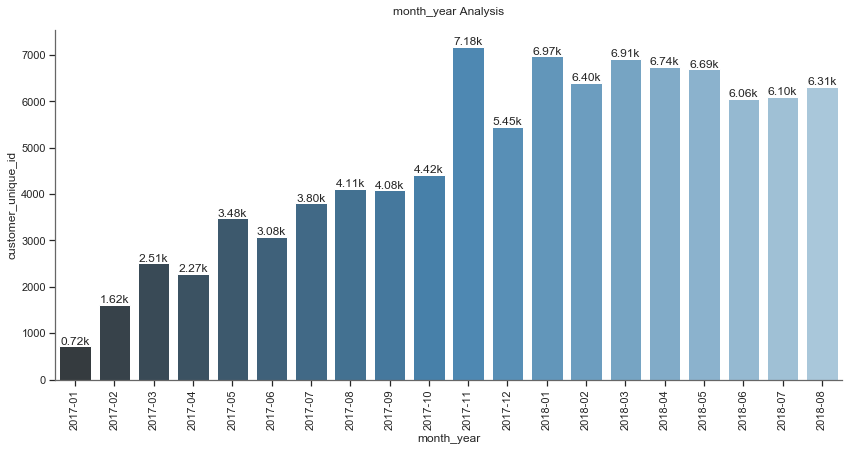

In [23]:
#creating monthly active customers dataframe by counting unique Customer IDs
df_monthly_active = df.groupby('month_year')['customer_unique_id'].nunique().reset_index()

fig, ax = plt.subplots(figsize=(12, 6))
sns.set(palette='muted', color_codes=True, style='whitegrid')
bar_plot(x='month_year', y='customer_unique_id', df=df_monthly_active, value=True)
ax.tick_params(axis='x', labelrotation=90)
plt.show()

## Monthly Order Count

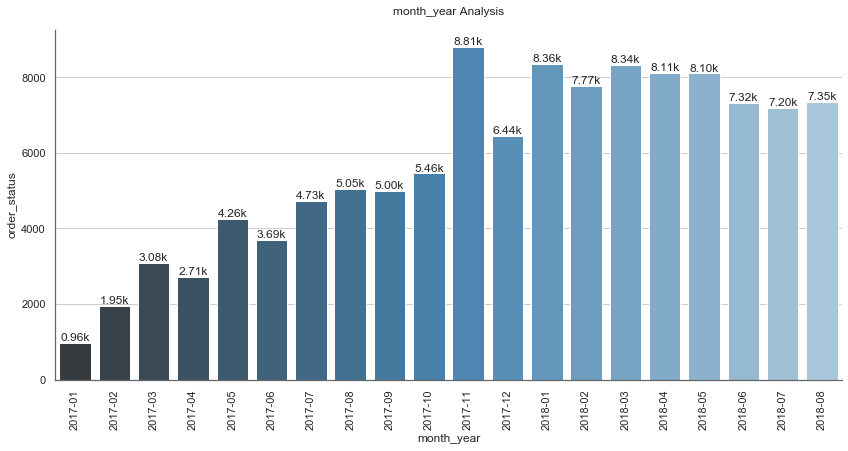

In [24]:
#creating monthly active customers dataframe by counting unique Customer IDs
df_monthly_sales = df.groupby('month_year')['order_status'].count().reset_index()

fig, ax = plt.subplots(figsize=(12, 6))
sns.set(palette='muted', color_codes=True, style='whitegrid')
bar_plot(x='month_year', y='order_status', df=df_monthly_sales, value=True)
ax.tick_params(axis='x', labelrotation=90)
plt.show()

## Average Revenue per Customer Purchase¶


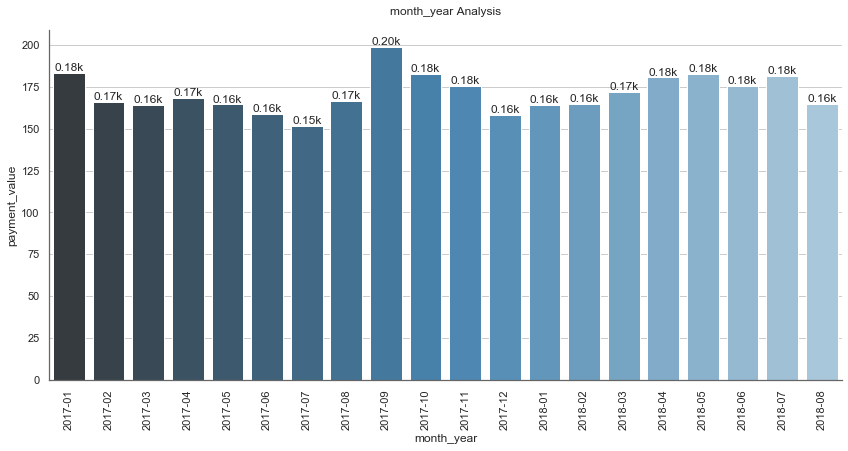

In [25]:
# create a new dataframe for average revenue by taking the mean of it
df_monthly_order_avg = df.groupby('month_year')['payment_value'].mean().reset_index()

fig, ax = plt.subplots(figsize=(12, 6))
sns.set(palette='muted', color_codes=True, style='whitegrid')
bar_plot(x='month_year', y='payment_value', df=df_monthly_order_avg, value=True)
ax.tick_params(axis='x', labelrotation=90)
plt.show()

## New Customer Ratio

In [26]:
#create a dataframe contaning CustomerID and first purchase date
df_min_purchase = df.groupby('customer_unique_id').order_purchase_timestamp.min().reset_index()
df_min_purchase.columns = ['customer_unique_id','minpurchasedate']
df_min_purchase['minpurchasedate'] = df_min_purchase['minpurchasedate'].map(lambda date: 100*date.year + date.month)

#merge first purchase date column to our main dataframe (tx_uk)
df = pd.merge(df, df_min_purchase, on='customer_unique_id')

In [27]:
#create a column called User Type and assign Existing 
#if User's First Purchase Year Month before the selected Invoice Year Month
df['usertype'] = 'New'
df.loc[df['month_y']>df['minpurchasedate'],'usertype'] = 'Existing'

#calculate the Revenue per month for each user type
df_user_type_revenue = df.groupby(['month_y','usertype', 'month_year'])['payment_value'].sum().reset_index()

df_user_type_revenue

month_y  usertype month_year  payment_value
0    201701       New    2017-01      176376.56
1    201702  Existing    2017-02         111.07
2    201702       New    2017-02      323704.88
3    201703  Existing    2017-03         596.38
4    201703       New    2017-03      505139.45
5    201704  Existing    2017-04        2677.76
6    201704       New    2017-04      453430.56
7    201705  Existing    2017-05        6733.95
8    201705       New    2017-05      694385.65
9    201706  Existing    2017-06        6956.06
10   201706       New    2017-06      578444.92
11   201707  Existing    2017-07       13276.36
12   201707       New    2017-07      702793.62
13   201708  Existing    2017-08       15000.05
14   201708       New    2017-08      827689.89
15   201709  Existing    2017-09       14011.16
16   201709       New    2017-09      982074.45
17   201710  Existing    2017-10       20695.65
18   201710       New    2017-10      977913.97
19   201711  Existing    2017-11       24770.55
20   201711       New    2017-11     1523777.31
21   201712  Existing    2017-12       24133.48
22   201712       New    2017-12      995933.78
23   201801  Existing    2018-01       24698.90
24   201801       New    2018-01     1349365.12
25   201802  Existing    2018-02       26661.62
26   201802       New    2018-02     1253352.92
27   201803  Existing    2018-03       34568.26
28   201803       New    2018-03     1400890.07
29   201804  Existing    2018-04       41982.07
30   201804       New    2018-04     1424625.08
31   201805  Existing    2018-05       35888.25
32   201805       New    2018-05     1444779.34
33   201806  Existing    2018-06       40794.44
34   201806       New    2018-06     1244602.34
35   201807  Existing    2018-07       33086.53
36   201807       New    2018-07     1273620.89
37   201808  Existing    2018-08       27898.55
38   201808       New    2018-08     1183341.54

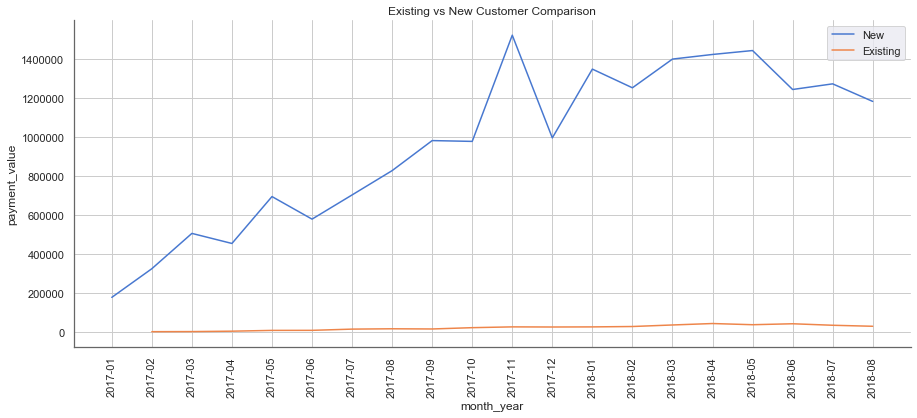

In [28]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.set(palette='muted', color_codes=True)
ax = sns.lineplot(x='month_year', y='payment_value', data=df_user_type_revenue.query("usertype == 'New'"), label='New')
ax = sns.lineplot(x='month_year', y='payment_value', data=df_user_type_revenue.query("usertype == 'Existing'"), label='Existing')
format_spines(ax, right_border=False)
ax.set_title('Existing vs New Customer Comparison')
ax.tick_params(axis='x', labelrotation=90)
plt.show()

## New Customer Ratio

In [29]:
#create a dataframe that shows new user ratio - we also need to drop NA values (first month new user ratio is 0)
df_user_ratio = df.query("usertype == 'New'").groupby(['month_year'])['customer_unique_id'].nunique()/df.query("usertype == 'Existing'").groupby(['month_year'])['customer_unique_id'].nunique() 
df_user_ratio = df_user_ratio.reset_index()

#dropping nan values that resulted from first and last month
df_user_ratio = df_user_ratio.dropna()
df_user_ratio.columns = ['month_year','NewCusRatio']

#print the dafaframe
df_user_ratio

month_year  NewCusRatio
1     2017-02   808.000000
2     2017-03   500.600000
3     2017-04   132.764706
4     2017-05   123.214286
5     2017-06    77.871795
6     2017-07    76.591837
7     2017-08    71.175439
8     2017-09    51.333333
9     2017-10    49.193182
10    2017-11    57.868852
11    2017-12    47.660714
12    2018-01    52.236641
13    2018-02    56.151786
14    2018-03    48.741007
15    2018-04    40.629630
16    2018-05    35.178378
17    2018-06    32.285714
18    2018-07    39.377483
19    2018-08    37.012048

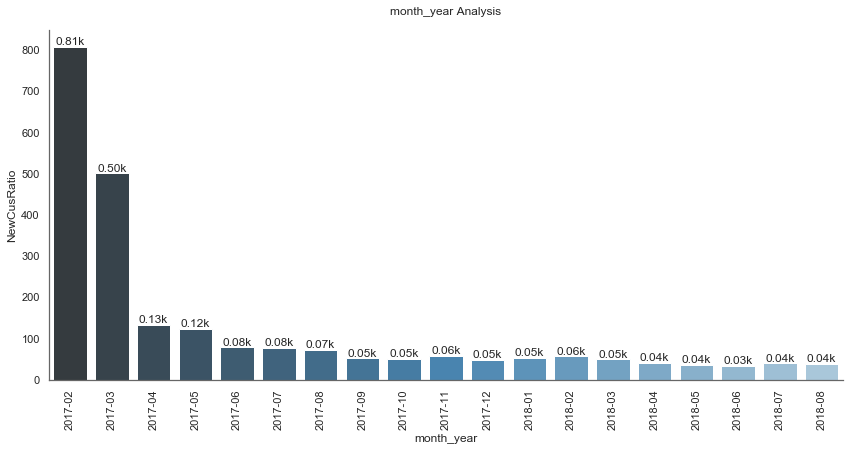

In [30]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.set(palette='muted', color_codes=True, style='whitegrid')
bar_plot(x='month_year', y='NewCusRatio', df=df_user_ratio, value=True)
ax.tick_params(axis='x', labelrotation=90)
plt.show()

## Monthly Retention Rate

In [31]:
#Monthly Retention Rate = Retained Customers From Prev. Month/Active Customers Total (using crosstab)

#identifying active users are active by looking at their revenue per month
df_user_purchase = df.groupby(['customer_unique_id','month_y'])['payment_value'].sum().reset_index()
df_user_purchase.head()

customer_unique_id  month_y  payment_value
0             C00001   201806         121.82
1             C00002   201806         155.76
2             C00003   201710         181.55
3             C00004   201802          90.78
4             C00005   201711         266.89

In [32]:
#identifying active users are active by looking at their order count per month
df_user_purchase = df.groupby(['customer_unique_id','month_y'])['payment_value'].count().reset_index()
df_user_purchase.head()

customer_unique_id  month_y  payment_value
0             C00001   201806              1
1             C00002   201806              1
2             C00003   201710              1
3             C00004   201802              1
4             C00005   201711              1

In [33]:
#create retention matrix with crosstab using purchase
df_retention = pd.crosstab(df_user_purchase['customer_unique_id'], df_user_purchase['month_y']).reset_index()
df_retention.head()

month_y customer_unique_id  201701  201702  201703  201704  201705  201706  \
0                   C00001       0       0       0       0       0       0   
1                   C00002       0       0       0       0       0       0   
2                   C00003       0       0       0       0       0       0   
3                   C00004       0       0       0       0       0       0   
4                   C00005       0       0       0       0       0       0   

month_y  201707  201708  201709  201710  201711  201712  201801  201802  \
0             0       0       0       0       0       0       0       0   
1             0       0       0       0       0       0       0       0   
2             0       0       0       1       0       0       0       0   
3             0       0       0       0       0       0       0       1   
4             0       0       0       0       1       0       0       0   

month_y  201803  201804  201805  201806  201807  201808  
0             0       0       0       1       0       0  
1             0       0       0       1       0       0  
2             0       0       0       0       0       0  
3             0       0       0       0       0       0  
4             0       0       0       0       0       0

In [34]:
#creating an array of dictionary which keeps Retained & Total User count for each month
months = df_retention.columns[2:]
retention_array = []
for i in range(len(months)-1):
    retention_data = {}
    selected_month = months[i+1]
    prev_month = months[i]
    retention_data['month_y'] = int(selected_month)
    retention_data['TotalUserCount'] = df_retention[selected_month].sum()
    retention_data['RetainedUserCount'] = df_retention[(df_retention[selected_month]>0) & (df_retention[prev_month]>0)][selected_month].sum()
    retention_array.append(retention_data)
    
#convert the array to dataframe and calculate Retention Rate
df_retention = pd.DataFrame(retention_array)
df_retention['RetentionRate'] = df_retention['RetainedUserCount']/df_retention['TotalUserCount']

df_retention

month_y  TotalUserCount  RetainedUserCount  RetentionRate
0    201703            2508                  3       0.001196
1    201704            2274                 11       0.004837
2    201705            3478                 14       0.004025
3    201706            3076                 16       0.005202
4    201707            3802                 16       0.004208
5    201708            4114                 23       0.005591
6    201709            4082                 32       0.007839
7    201710            4417                 32       0.007245
8    201711            7182                 37       0.005152
9    201712            5450                 41       0.007523
10   201801            6974                 16       0.002294
11   201802            6401                 27       0.004218
12   201803            6914                 23       0.003327
13   201804            6744                 31       0.004597
14   201805            6693                 45       0.006723
15   201806            6058                 38       0.006273
16   201807            6097                 26       0.004264
17   201808            6310                 37       0.005864

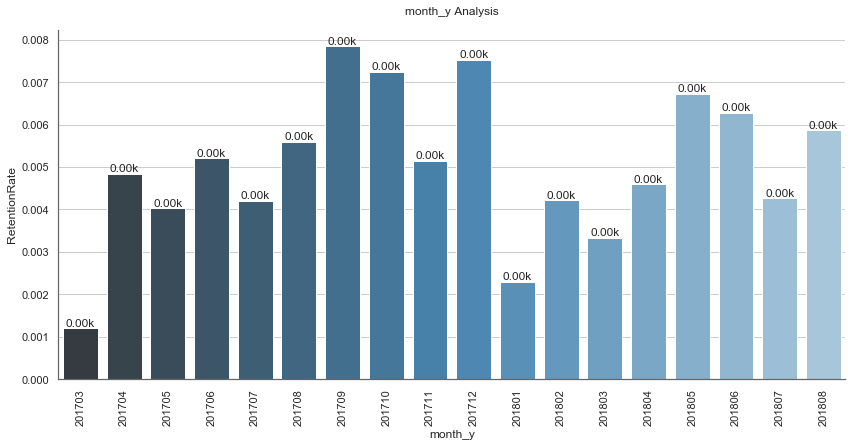

In [35]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.set(palette='muted', color_codes=True, style='whitegrid')
bar_plot(x='month_y', y='RetentionRate', df=df_retention, value=True)
ax.tick_params(axis='x', labelrotation=90)
plt.show()

## Cohort Based Retention Rate

Cohorts are determined as first purchase year-month of the customers. We will be measuring what percentage of the customers retained after their first purchase in each month. This view will help unveil how recent and old cohorts differ regarding retention rate and if recent changes in customer experience affected new customer’s retention or not.


In [36]:
#create our retention table again with crosstab() - we need to change the column names for using them in .query() function
df_retention = pd.crosstab(df_user_purchase['customer_unique_id'], df_user_purchase['month_y']).reset_index()
new_column_names = [ 'm_' + str(column) for column in df_retention.columns]
df_retention.columns = new_column_names

In [37]:
#create our retention table again with crosstab() - we need to change the column names for using them in .query() function
df_retention = pd.crosstab(df_user_purchase['customer_unique_id'], df_user_purchase['month_y']).reset_index()
new_column_names = [ 'm_' + str(column) for column in df_retention.columns]
df_retention.columns = new_column_names
#create the array of Retained users for each cohort monthly
retention_array = []
for i in range(len(months)):
    retention_data = {}
    selected_month = months[i]
    prev_months = months[:i]
    next_months = months[i+1:]
    for prev_month in prev_months:
        retention_data[prev_month] = np.nan
        
    total_user_count =  retention_data['TotalUserCount'] = df_retention['m_' + str(selected_month)].sum()
    retention_data[selected_month] = 1 
    
    query = "{} > 0".format('m_' + str(selected_month))
        

    for next_month in next_months:
        query = query + " and {} > 0".format(str('m_' + str(next_month)))
        retention_data[next_month] = np.round(df_retention.query(query)['m_' + str(next_month)].sum()/total_user_count,2)
    retention_array.append(retention_data)


In [38]:
#create the array of Retained users for each cohort monthly
retention_array = []
for i in range(len(months)):
    retention_data = {}
    selected_month = months[i]
    prev_months = months[:i]
    next_months = months[i+1:]
    for prev_month in prev_months:
        retention_data[prev_month] = np.nan
        
    total_user_count =  retention_data['TotalUserCount'] = df_retention['m_' + str(selected_month)].sum()
    retention_data[selected_month] = 1 
    
    query = "{} > 0".format('m_' + str(selected_month))
     

    for next_month in next_months:
        query = query + " and {} > 0".format(str('m_' + str(next_month)))
        retention_data[next_month] = np.round(df_retention.query(query)['m_' + str(next_month)].sum()/total_user_count,2)
    retention_array.append(retention_data)
    
df_retention = pd.DataFrame(retention_array)
df_retention.index = months

#showing new cohort based retention table
df_retention

TotalUserCount  201702  201703  201704  201705  201706  201707  \
month_y                                                                   
201702             1618     1.0     0.0     0.0    0.00     0.0    0.00   
201703             2508     NaN     1.0     0.0    0.00     0.0    0.00   
201704             2274     NaN     NaN     1.0    0.01     0.0    0.00   
201705             3478     NaN     NaN     NaN    1.00     0.0    0.00   
201706             3076     NaN     NaN     NaN     NaN     1.0    0.01   
201707             3802     NaN     NaN     NaN     NaN     NaN    1.00   
201708             4114     NaN     NaN     NaN     NaN     NaN     NaN   
201709             4082     NaN     NaN     NaN     NaN     NaN     NaN   
201710             4417     NaN     NaN     NaN     NaN     NaN     NaN   
201711             7182     NaN     NaN     NaN     NaN     NaN     NaN   
201712             5450     NaN     NaN     NaN     NaN     NaN     NaN   
201801             6974     NaN     NaN     NaN     NaN     NaN     NaN   
201802             6401     NaN     NaN     NaN     NaN     NaN     NaN   
201803             6914     NaN     NaN     NaN     NaN     NaN     NaN   
201804             6744     NaN     NaN     NaN     NaN     NaN     NaN   
201805             6693     NaN     NaN     NaN     NaN     NaN     NaN   
201806             6058     NaN     NaN     NaN     NaN     NaN     NaN   
201807             6097     NaN     NaN     NaN     NaN     NaN     NaN   
201808             6310     NaN     NaN     NaN     NaN     NaN     NaN   

         201708  201709  201710  201711  201712  201801  201802  201803  \
month_y                                                                   
201702     0.00    0.00    0.00    0.00    0.00     0.0     0.0     0.0   
201703     0.00    0.00    0.00    0.00    0.00     0.0     0.0     0.0   
201704     0.00    0.00    0.00    0.00    0.00     0.0     0.0     0.0   
201705     0.00    0.00    0.00    0.00    0.00     0.0     0.0     0.0   
201706     0.00    0.00    0.00    0.00    0.00     0.0     0.0     0.0   
201707     0.01    0.00    0.00    0.00    0.00     0.0     0.0     0.0   
201708     1.00    0.01    0.00    0.00    0.00     0.0     0.0     0.0   
201709      NaN    1.00    0.01    0.00    0.00     0.0     0.0     0.0   
201710      NaN     NaN    1.00    0.01    0.00     0.0     0.0     0.0   
201711      NaN     NaN     NaN    1.00    0.01     0.0     0.0     0.0   
201712      NaN     NaN     NaN     NaN    1.00     0.0     0.0     0.0   
201801      NaN     NaN     NaN     NaN     NaN     1.0     0.0     0.0   
201802      NaN     NaN     NaN     NaN     NaN     NaN     1.0     0.0   
201803      NaN     NaN     NaN     NaN     NaN     NaN     NaN     1.0   
201804      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
201805      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
201806      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
201807      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
201808      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

         201804  201805  201806  201807  201808  
month_y                                          
201702      0.0    0.00    0.00     0.0    0.00  
201703      0.0    0.00    0.00     0.0    0.00  
201704      0.0    0.00    0.00     0.0    0.00  
201705      0.0    0.00    0.00     0.0    0.00  
201706      0.0    0.00    0.00     0.0    0.00  
201707      0.0    0.00    0.00     0.0    0.00  
201708      0.0    0.00    0.00     0.0    0.00  
201709      0.0    0.00    0.00     0.0    0.00  
201710      0.0    0.00    0.00     0.0    0.00  
201711      0.0    0.00    0.00     0.0    0.00  
201712      0.0    0.00    0.00     0.0    0.00  
201801      0.0    0.00    0.00     0.0    0.00  
201802      0.0    0.00    0.00     0.0    0.00  
201803      0.0    0.00    0.00     0.0    0.00  
201804      1.0    0.01    0.00     0.0    0.00  
201805 

## RFM Modeling

## Behavioral segmentation by 3 important features:
- Recency — number of days since the last purchase
- Frequency — number of transactions made over a given period
- Monetary — amount spent over a given period of time

In [40]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [41]:
from datetime import timedelta, datetime
import squarify

In [42]:
Olist_db = pd.read_csv("olistpreprocesseddata/olistpre1/OLIST_ALL_DATA.csv")

In [45]:
Olist_db['order_purchase_date'] = Olist_db.order_purchase_timestamp.apply(lambda x: pd.to_datetime(x, format="%Y-%m-%d"))

In [46]:
Olist_db.columns

Index(['order_id', 'order_id3', 'customer_id3', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id3',
       'seller_id3', 'shipping_limit_date', 'price', 'freight_value',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'review_id', 'review_id3', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'product_id',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'customer_id', 'customer_unique_id', 'customer_uniqueid3',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'seller_id', 'seller_zip_code_prefix', 'seller_city', '

In [47]:
Olist_db['InvoiceDate'] = Olist_db.order_purchase_date.apply(lambda x : datetime.strftime(x, '%Y-%m-%d'))

In [48]:
Olist_db['InvoiceDate'] = pd.to_datetime(Olist_db['InvoiceDate'])

In [49]:
print('{:,} rows; {:,} columns'
      .format(Olist_db.shape[0], Olist_db.shape[1]))
print('{:,} transactions don\'t have a customer id'
      .format(Olist_db[Olist_db.customer_unique_id.isnull()].shape[0]))
print('Transactions timeframe from {} to {}'.format(Olist_db['InvoiceDate'].min(),
                                    Olist_db['InvoiceDate'].max()))

116,581 rows; 55 columns
0 transactions don't have a customer id
Transactions timeframe from 2016-09-04 00:00:00 to 2018-09-03 00:00:00


In [50]:
# Create snapshot date
snapshot_date = Olist_db['InvoiceDate'].max() + timedelta(days=1)
snapshot_date

Timestamp('2018-09-04 00:00:00')

In [51]:
# Grouping by CustomerID
data_process = Olist_db.groupby(['customer_unique_id']).agg({
        'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
        'order_id': 'count',
        'payment_value': 'sum'})

In [52]:
data_process.rename(columns={'InvoiceDate': 'Recency',
                         'order_id': 'Frequency',
                         'payment_value': 'Monetary'}, inplace=True)
data_process

Recency  Frequency  Monetary
customer_unique_id                              
C00001                   73          1    121.82
C00002                   66          1    155.76
C00003                  337          1    181.55
C00004                  193          1     90.78
C00005                  283          1    266.89
...                     ...        ...       ...
C96994                  112          1     32.00
C96995                   39          2    223.84
C96996                   33          1    288.88
C96997                   40          5    960.75
C96999                  232          1     39.00

[94087 rows x 3 columns]

In [70]:
data_process['Frequency'].value_counts()

1     79915
2     10323
3      2003
4       956
5       337
6       300
7        73
8        45
9        25
10       25
12       25
11       18
14        8
24        7
15        7
13        4
20        4
21        3
75        1
35        1
16        1
18        1
19        1
22        1
26        1
29        1
38        1
Name: Frequency, dtype: int64

Great, we have 41,431 customer records grouped by recency of their purchase, the frequency by their quantity, and the monetary value of the purchases. Now we can get into the meat of things and use the .qcut() method to assign the relative percentile to their RFM features. But before that, let’s examine the distribution of our Recency, Frequency, and Monetary.

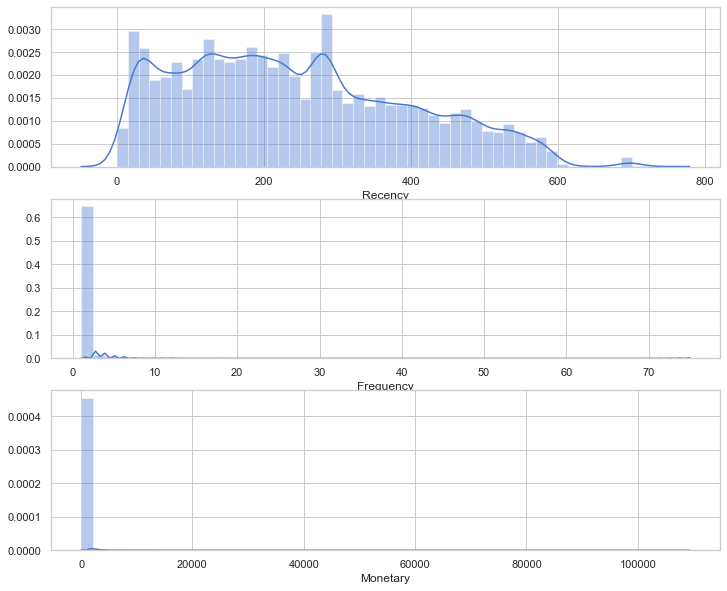

In [53]:
plt.figure(figsize=(12,10))
# Plot distribution of Recency
plt.subplot(3, 1, 1)
sns.distplot(data_process['Recency'])
# Plot distribution of Frequency
plt.subplot(3, 1, 2)
sns.distplot(data_process['Frequency'])
# Plot distribution of Monetary
plt.subplot(3, 1, 3)
sns.distplot(data_process['Monetary'])
# Show the plot
plt.show()

In [ ]:
# Create labels for Recency and Frequency
r_labels = range(4, 0, -1); f_labels = ['Bronze', 'Silver']
# Assign these labels to 4 equal percentile groups 
r_groups = pd.qcut(data_process['Recency'], q=4, labels=r_labels)
# Assign these labels to 4 equal percentile groups 
#f_groups = pd.qcut(data_process['Frequency'], q=[0, .7,  1], labels=f_labels, duplicates='drop')
# Create new columns R and F 
data_process = data_process.assign(R = r_groups.values)#, F = f_groups.values)
data_process.head()

In [77]:
# Create labels for MonetaryValue
m_labels = range(1, 5)
# Assign these labels to three equal percentile groups 
m_groups = pd.qcut(data_process['Monetary'], q=4, labels=m_labels)
# Create new column M
data_process = data_process.assign(M = m_groups.values)

In [64]:
data_process

Recency  Frequency  Monetary  R  M
customer_unique_id                                    
C00001                   73          1    121.82  4  3
C00002                   66          1    155.76  4  3
C00003                  337          1    181.55  2  3
C00004                  193          1     90.78  3  2
C00005                  283          1    266.89  2  4
...                     ...        ...       ... .. ..
C96994                  112          1     32.00  4  1
C96995                   39          2    223.84  4  4
C96996                   33          1    288.88  4  4
C96997                   40          5    960.75  4  4
C96999                  232          1     39.00  2  1

[94087 rows x 5 columns]

with these 3 scores in place, R, F, and M, we can create our first RFM segment by concatenating the values together below

In [65]:
# Concat RFM quartile values to create RFM Segments
def join_rfm(x): 
    return str(x['R']) + str(x['M'])

data_process['RFM_Segment'] = data_process.apply(join_rfm, axis=1)
rfm = data_process
rfm.head()

Recency  Frequency  Monetary  R  M RFM_Segment
customer_unique_id                                                
C00001                   73          1    121.82  4  3          43
C00002                   66          1    155.76  4  3          43
C00003                  337          1    181.55  2  3          23
C00004                  193          1     90.78  3  2          32
C00005                  283          1    266.89  2  4          24

In [66]:
# Count num of unique segments
rfm_count_unique = rfm.groupby('RFM_Segment')['RFM_Segment'].nunique()
print(rfm_count_unique.sum())

16


In [67]:
rfm['RFM_Score'] = rfm[['R','M']].sum(axis=1)
print(rfm['RFM_Score'].head())

customer_unique_id
C00001    7.0
C00002    7.0
C00003    5.0
C00004    5.0
C00005    6.0
Name: RFM_Score, dtype: float64


### Segmentation using RFM Analysis | Identify Upselling and Cross selling opportunities

In [85]:
# Define rfm_level function
def rfm_level(df):
    if (df['RFM_Segment'] >= 44 or (df['RFM_Score'] >= 8)) :
        return 'VVIP - Can\'t Loose Them'
    elif ((df['RFM_Score'] >= 7) and (df['M'] == 4)):
        return 'Champions Big Spenders'
#     elif ((df['RFM_Score'] >= 6) and (df['F'] >= 2)):
#         return 'Loyal Customers'
    elif ((df['RFM_Segment'] >= 21) or (df['RFM_Score'] >= 6)):
        return 'Potential Loyalists'
    elif (((df['RFM_Segment'] >= 11) and (df['R'] == 1)) or df['RFM_Score'] == 4):
        return 'Needs Attention'
    elif ((df['RFM_Score'] >= 3) and (df['R'] == 1)):
        return 'Hibernating - Almost Lost'
    else:
        return 'Lost Customers'

In [86]:
# Define rfm_level function
def rfm_action(df):
    if (df['RFM_Segment'] >= 44 or (df['RFM_Score'] >= 8)) :
        return 'No Price Incentives; Offer Limited edition and Loyality programs'
    elif ((df['RFM_Score'] >= 7) and (df['M'] == 4)):
        return 'Upsell most expensive items'
#     elif ((df['RFM_Score'] >= 6) and (df['F'] >= 2)):
#         return 'Loyality programs;Cross Sell'
    elif ((df['RFM_Segment'] >= 21) or (df['RFM_Score'] >= 5)):
        return 'Cross Sell Recommendations and Discount coupons'
    elif (((df['RFM_Segment'] >= 11) and (df['R'] == 1)) or df['RFM_Score'] == 4):
        return 'Price incentives and Limited time offer'
    elif ((df['RFM_Score'] >= 3) and (df['R'] == 1)):
        return 'Aggressive price incentives'
    else:
        return 'Don\'t spend too much trying to re-acquire'

In [87]:
# Create a new variable RFM_Level
rfm['RFM_Segment'] = rfm.RFM_Segment.apply(lambda x: int(x))
rfm['Customer Segment'] = rfm.apply(rfm_level, axis=1)
# Create a new variable RFM_Level
rfm['Marketing Action'] = rfm.apply(rfm_action, axis=1)
rfm.head(10)

Recency  Frequency  Monetary  R  M  RFM_Segment  \
customer_unique_id                                                    
C00001                   73          1    121.82  4  3           43   
C00002                   66          1    155.76  4  3           43   
C00003                  337          1    181.55  2  3           23   
C00004                  193          1     90.78  3  2           32   
C00005                  283          1    266.89  2  4           24   
C00006                  105          2    267.96  4  4           44   
C00007                   82          1     70.03  4  2           42   
C00008                  169          1    165.94  3  3           33   
C00009                  366          1    103.64  1  2           12   
C00010                  321          2    693.72  2  4           24   

                    RFM_Score         Customer Segment  \
customer_unique_id                                       
C00001                    7.0      Potential Loyalists   
C00002                    7.0      Potential Loyalists   
C00003                    5.0      Potential Loyalists   
C00004                    5.0      Potential Loyalists   
C00005                    6.0      Potential Loyalists   
C00006                    8.0  VVIP - Can't Loose Them   
C00007                    6.0      Potential Loyalists   
C00008                    6.0      Potential Loyalists   
C00009                    3.0          Needs Attention   
C00010                    6.0      Potential Loyalists   

                                                     Marketing Action  
customer_unique_id                                                     
C00001                Cross Sell Recommendations and Discount coupons  
C00002                Cross Sell Recommendations and Discount coupons  
C00003                Cross Sell Recommendations and Discount coupons  
C00004                Cross Sell Recommendations and Discount coupons  
C00005                Cross Sell Recommendations and Discount coupons  
C00006              No Price Incentives; Offer Limited edition and...  
C00007                Cross Sell Recommendations and Discount coupons  
C00008                Cross Sell Recommendations and Discount coupons  
C00009                        Price incentives and Limited time offer  
C00010                Cross Sell Recommendations and Discount coupons

In [188]:
rfm.to_csv("csvfordash/rfm.csv")

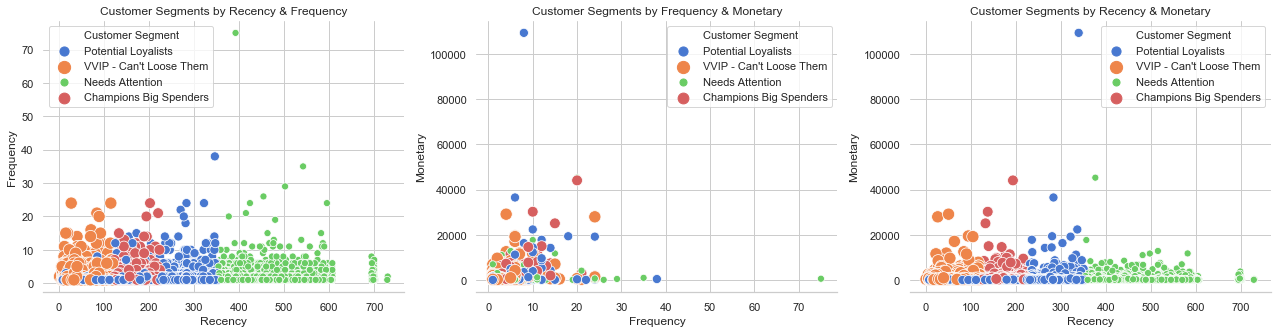

In [106]:
# plotting the distribution of the continous feature set
sns.set(palette='muted', color_codes=True, style='whitegrid')
fig, axs = plt.subplots(1, 3, figsize=(22, 5))
sns.despine(left=True)
sns.scatterplot(x='Recency', y='Frequency', ax=axs[0], hue='Customer Segment', data=rfm, size='Customer Segment', sizes=(50,150), size_order=['VVIP - Can\'t Loose Them','Champions Big Spenders','Potential Loyalists','Needs Attention'])
sns.scatterplot(x='Frequency', y='Monetary', ax=axs[1], hue='Customer Segment', data=rfm, size='Customer Segment' , sizes=(50,150), size_order=['VVIP - Can\'t Loose Them','Champions Big Spenders','Potential Loyalists','Needs Attention'])
sns.scatterplot(x='Recency', y='Monetary', ax=axs[2], hue='Customer Segment', data=rfm, size='Customer Segment' , sizes=(50,150), size_order=['VVIP - Can\'t Loose Them','Champions Big Spenders','Potential Loyalists','Needs Attention'])
axs[0].set_title('Customer Segments by Recency & Frequency')
axs[1].set_title('Customer Segments by Frequency & Monetary')
axs[2].set_title('Customer Segments by Recency & Monetary')
plt.show()

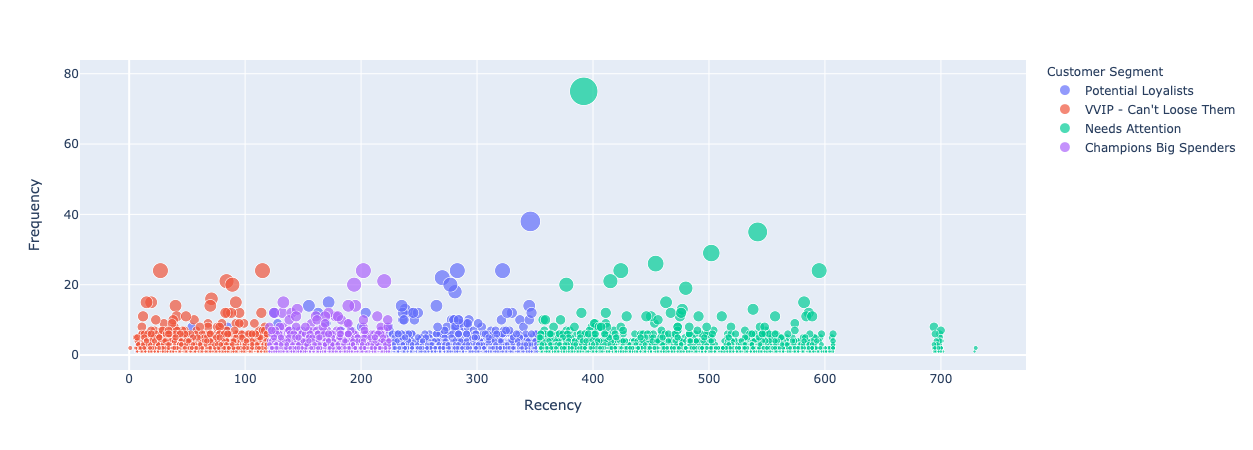

In [114]:
import plotly.express as px

fig = px.scatter(rfm, x="Recency", y="Frequency", color="Customer Segment", size = "Frequency")
fig.show()

### Group Customer by their Customer Segment

In [88]:
# Calculate average values for each Customer Segment, and return a size of each segment 
rfm_level_agg = rfm.groupby('Customer Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count'],
    'Marketing Action': 'unique'
}).round(1)
# Print the aggregated dataset
print(rfm_level_agg)

                        Recency Frequency Monetary         \
                           mean      mean     mean  count   
Customer Segment                                            
Champions Big Spenders    171.8       1.7    565.9   5873   
Needs Attention           458.4       1.2    208.6  23440   
Potential Loyalists       183.6       1.1    143.6  58814   
VVIP - Can't Loose Them    64.8       1.7    587.1   5960   

                                                          Marketing Action  
                                                                    unique  
Customer Segment                                                            
Champions Big Spenders                       [Upsell most expensive items]  
Needs Attention          [Price incentives and Limited time offer, Cros...  
Potential Loyalists      [Cross Sell Recommendations and Discount coupons]  
VVIP - Can't Loose Them  [No Price Incentives; Offer Limited edition an...  


In [89]:
rfm_level_ag = pd.DataFrame(rfm_level_agg)
rfm_level_ag = rfm_level_ag.reset_index()
rfm_level_ag

Customer Segment Recency Frequency Monetary         \
                              mean      mean     mean  count   
0   Champions Big Spenders   171.8       1.7    565.9   5873   
1          Needs Attention   458.4       1.2    208.6  23440   
2      Potential Loyalists   183.6       1.1    143.6  58814   
3  VVIP - Can't Loose Them    64.8       1.7    587.1   5960   

                                    Marketing Action  
                                              unique  
0                      [Upsell most expensive items]  
1  [Price incentives and Limited time offer, Cros...  
2  [Cross Sell Recommendations and Discount coupons]  
3  [No Price Incentives; Offer Limited edition an...

In [163]:
ck = pd.DataFrame(rfm_level_ag[("Monetary","count")])

In [164]:
ck['new'] = (rfm_level_ag[("Monetary","count")]/sum(rfm_level_ag[("Monetary","count")]))*100

In [165]:
ck

Monetary        new
     count           
0     5873   6.242095
1    23440  24.913112
2    58814  62.510230
3     5960   6.334563

In [166]:
decimals = 2    
ck['new'] = ck['new'].apply(lambda x: round(x, decimals))

In [168]:
ck['new']=ck['new'].astype(str)
ck['new']

0     6.24
1    24.91
2    62.51
3     6.33
Name: new, dtype: object

In [169]:

ck.new=[x+'%'for x in ck.new]
ck

Monetary     new
     count        
0     5873   6.24%
1    23440  24.91%
2    58814  62.51%
3     5960   6.33%

From here, we can see that a sufficient percentage (~45%) of our customers are in the top tier RFM levels. Olist must be doing something right to be maintaining their loyalty!
The other 55% will need some work.


#### 1. Potential Loyalists — 
High potential to enter our loyal customer segments, why not throw in some freebies on their next purchase to show that you value them!
#### 2. Needs Attention — 
Showing promising signs with quantity and value of their purchase but it has been a while since they last bought sometime from you. Let’s target them with their wishlist items and a limited time offer discount.
#### 3. Hibernating Almost Lost —
Made some initial purchase but have not seen them since. Was it a bad customer experience? Or product-market fit? Let’s spend some resource build our brand awareness with them.
#### 4. Lost Customers	—
Poorest performers of our RFM model. They might have went with our competitors for now and will require a different activation strategy to win them back.

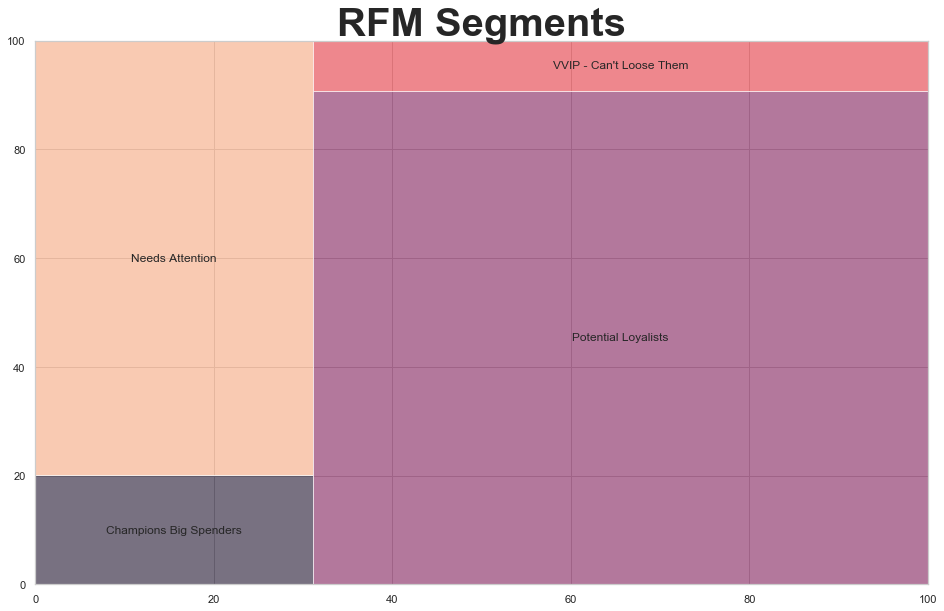

In [90]:
rfm_level_agg.columns = rfm_level_agg.columns.droplevel()
rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count', 'MarketingAction']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 10)
squarify.plot(sizes=rfm_level_agg['Count'], 
              label=['Champions Big Spenders',
                     'Needs Attention',
                     'Potential Loyalists',
                     'VVIP - Can\'t Loose Them'], alpha=.6 )
plt.title("RFM Segments",fontsize=40,fontweight="bold")
plt.axis('on')
plt.show()

In [144]:
rfm_level_ag

Customer Segment Recency Frequency Monetary         \
                              mean      mean     mean  count   
0   Champions Big Spenders   171.8       1.7    565.9   5873   
1          Needs Attention   458.4       1.2    208.6  23440   
2      Potential Loyalists   183.6       1.1    143.6  58814   
3  VVIP - Can't Loose Them    64.8       1.7    587.1   5960   

                                    Marketing Action  
                                              unique  
0                      [Upsell most expensive items]  
1  [Price incentives and Limited time offer, Cros...  
2  [Cross Sell Recommendations and Discount coupons]  
3  [No Price Incentives; Offer Limited edition an...

In [170]:
rfm_level_ag['%ofTotalCustomers'] = ck['new']


In [175]:
rfm_level_ag

Customer Segment Recency Frequency Monetary         \
                              mean      mean     mean  count   
0   Champions Big Spenders   171.8       1.7    565.9   5873   
1          Needs Attention   458.4       1.2    208.6  23440   
2      Potential Loyalists   183.6       1.1    143.6  58814   
3  VVIP - Can't Loose Them    64.8       1.7    587.1   5960   

                                    Marketing Action %ofTotalCustomers  \
                                              unique                     
0                      [Upsell most expensive items]          6.242095   
1  [Price incentives and Limited time offer, Cros...         24.913112   
2  [Cross Sell Recommendations and Discount coupons]         62.510230   
3  [No Price Incentives; Offer Limited edition an...          6.334563   

   Customer Segmentation     kkk  
                                  
0  Customer Segmentation   6.24%  
1  Customer Segmentation  24.91%  
2  Customer Segmentation  62.51%  
3  Customer Segmentation   6.33%

In [174]:
rfm_level_ag = rfm_level_ag.rename(columns={'%ofTotalCustomers':'kkk','%count': '%ofTotalCustomers'})

### Interactive Chart for Visualising Customer Segments

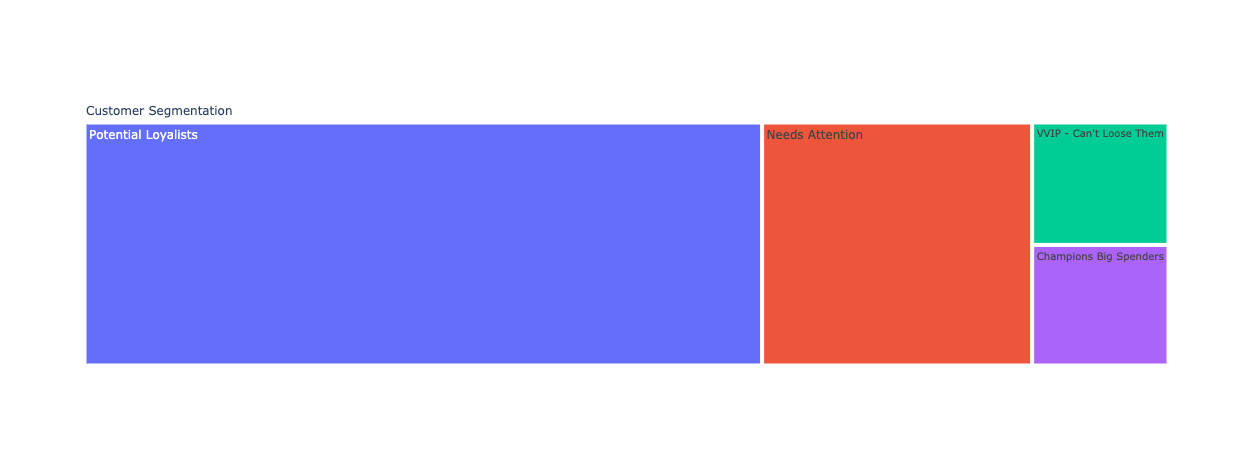

In [156]:
import plotly.graph_objects as go

fig =go.Figure(go.Treemap(
    labels = rfm_level_ag['Customer Segment'],
    parents = ['Customer Segmentation', 'Customer Segmentation', 'Customer Segmentation', 'Customer Segmentation', 'Customer Segmentation', 'Customer Segmentation', 'Customer Segmentation'],   #rfm_level_ag[('Marketing Action', 'unique')].tolist(), 
    values= rfm_level_ag[('%count')],
   
))

fig.show()

In [186]:
#rfm_level_ag.to_csv("csvfordash/CustomerSeg1.csv")

We can form our Marketing campaigns and targeting Strategies based on the above Customer Segmentation. 

- We can Upsell high end products to Big Spenders
- We can Cross Sell complimentary products to Loyal and Best Customers

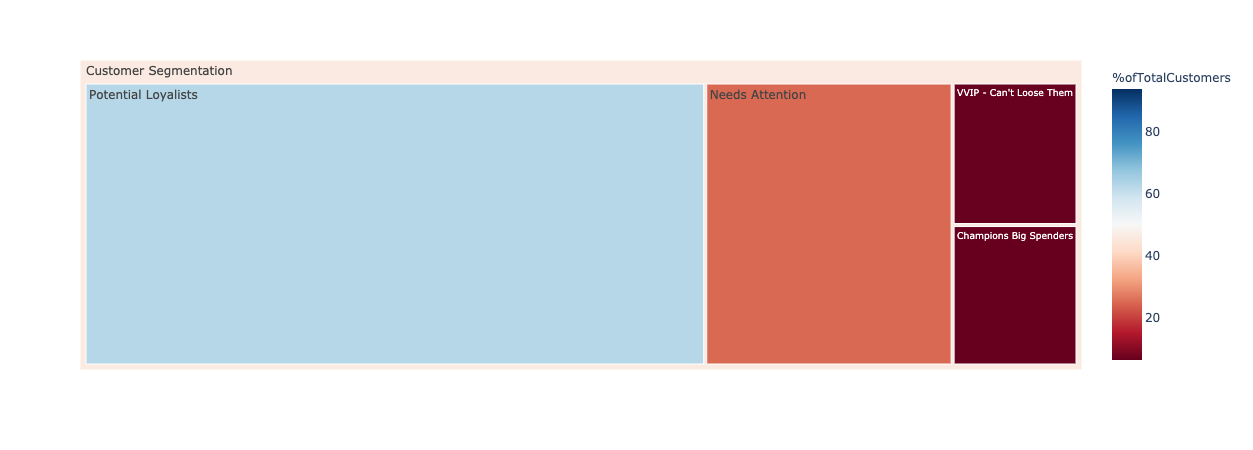

In [184]:
import plotly.express as px
import numpy as np
rfm_level_ag["Customer Segmentation"] = "Customer Segmentation" # in order to have a single root node
fig = px.treemap(rfm_level_ag, path=['Customer Segmentation', 'Customer Segment'], values='%ofTotalCustomers',
                  color='%ofTotalCustomers',
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=50
                 #np.average(rfm_level_ag['%ofTotalCustomers'], weights=rfm_level_ag['%ofTotalCustomers'])
                )
fig.show()

### K-Means Clustering

We have carefully crafted the clusters based on the RFM score and segmented customers. Now lets apply a Machine Learning approach to identify if there are any hidden segments we can find from clusters.

In [93]:
data_rfm = rfm[['Recency', 'Frequency', 'Monetary']]
data_rfm.min()

Recency      1.00
Frequency    1.00
Monetary     9.59
dtype: float64

In [94]:
import numpy as np
from sklearn.preprocessing import StandardScaler

data_log = np.log(data_rfm)
scaler = StandardScaler()
scaler.fit(data_log)
data_normalized = scaler.transform(data_log)
data_normalized = pd.DataFrame(data=data_normalized, index=data_rfm.index, columns=data_rfm.columns)

In [95]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=1) 
kmeans.fit(data_normalized)
cluster_labels = kmeans.labels_
data_rfm_k5 = data_rfm.assign(Cluster=cluster_labels)
grouped = data_rfm_k5.groupby(['Cluster'])
grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
  }).round(1)

Recency Frequency Monetary       
           mean      mean     mean  count
Cluster                                  
0         284.2       1.0    277.3  27696
1          49.8       1.0    134.7  16259
2         296.1       1.0     64.7  36628
3         237.9       4.4   1512.5   3023
4         256.9       2.1    319.0  10481

To find which ‘k’ value is more suitable for our data we will use elbow method.

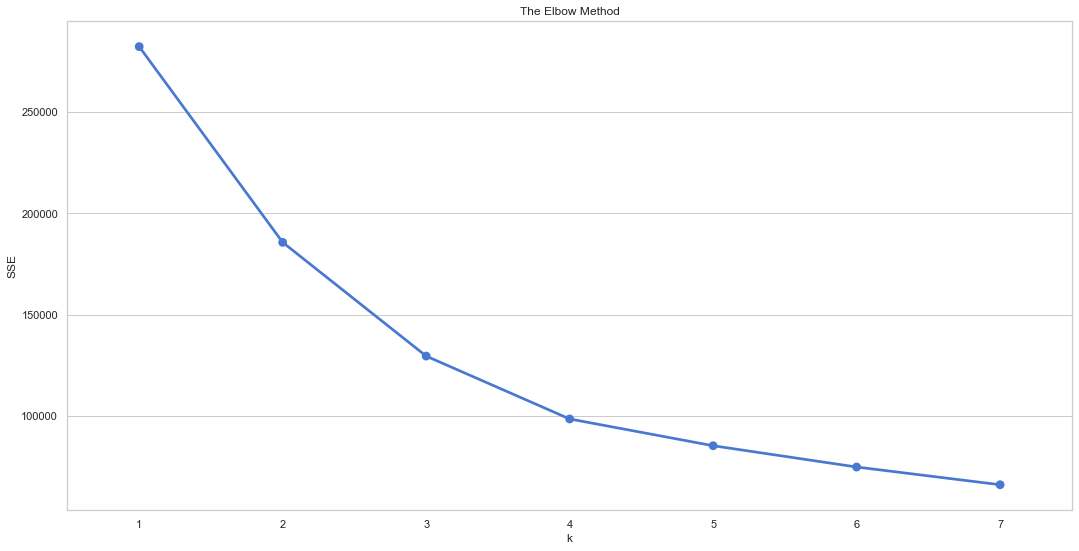

In [96]:
sse = {}
for k in range(1, 8):  
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(data_normalized)
    sse[k] = kmeans.inertia_
plt.figure(figsize=(18,9))

plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [97]:
kmeans = KMeans(n_clusters=4, random_state=1) 
kmeans.fit(data_normalized)
cluster_labels = kmeans.labels_
data_rfm_k4 = data_rfm.assign(Cluster=cluster_labels)
grouped = data_rfm_k4.groupby(['Cluster'])
grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
  }).round(1)

Recency Frequency Monetary       
           mean      mean     mean  count
Cluster                                  
0         295.8       1.0     64.0  36585
1         252.7       2.6    603.4  13078
2         284.9       1.0    275.0  28061
3          49.9       1.0    134.8  16363

In [98]:
data_melt = pd.melt(
                    data_rfm_k4.reset_index(),               
                    id_vars=['customer_unique_id', 'Cluster'],
                    value_vars=['Recency', 'Frequency', 'Monetary'], 
                    var_name='Metric', value_name='Value'
                    )
data_melt.head(10)

customer_unique_id  Cluster   Metric  Value
0             C00001        3  Recency   73.0
1             C00002        3  Recency   66.0
2             C00003        2  Recency  337.0
3             C00004        0  Recency  193.0
4             C00005        2  Recency  283.0
5             C00006        1  Recency  105.0
6             C00007        3  Recency   82.0
7             C00008        2  Recency  169.0
8             C00009        0  Recency  366.0
9             C00010        1  Recency  321.0

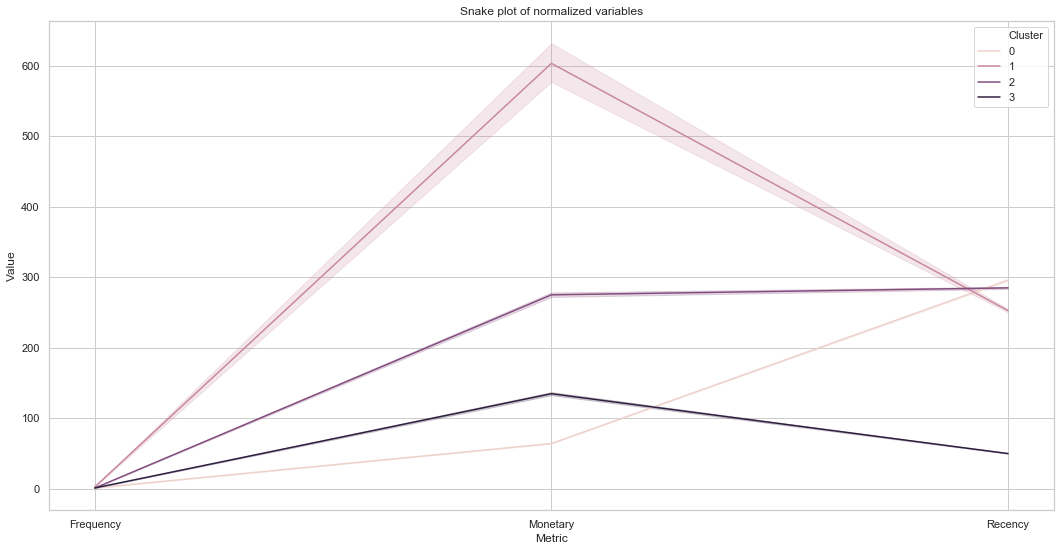

In [99]:
# Snake Plot
plt.figure(figsize = (18,9))
plt.title('Snake plot of normalized variables')
plt.xlabel('Metric')
plt.ylabel('Value')
sns.lineplot(data=data_melt, x='Metric', y='Value', hue='Cluster')
plt.show()

### Calculate relative importance of each attribute
Now we will calculate the relative importance of the RFM values within each cluster.

In [100]:
cluster_avg = data_rfm_k4.groupby(['Cluster']).mean() 
population_avg = data_rfm.mean()
relative_imp = cluster_avg / population_avg - 1
relative_imp.round(2)

Recency  Frequency  Monetary
Cluster                              
0           0.21      -0.18     -0.70
1           0.04       1.13      1.82
2           0.17      -0.19      0.28
3          -0.80      -0.16     -0.37

In [187]:
relative_imp.to_csv("csvfordash/CustomerSeg2relimp.csv")

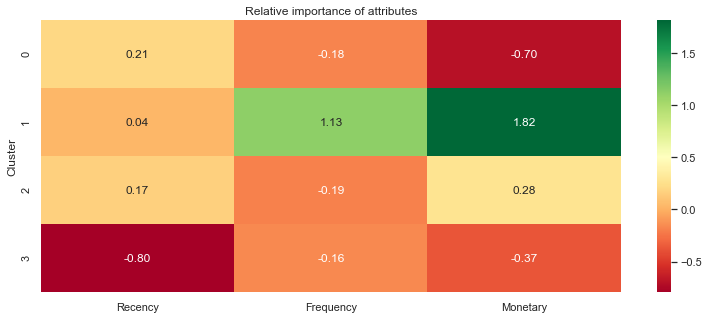

In [193]:
plt.figure(figsize=(13, 5))
plt.title('Relative importance of attributes')
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.savefig('csvfordash/kmeans.png',transparent=True)
plt.show()


### Relative Importance of RFM among K-Means Clusters

We can see that our grouped summary of the mean of R, F, M that each cluster of customers places a different emphasis on our 4 features:

#### Cluster 0
It performs poorly across R, F, and M. we will need to design campaigns to activate them again.

#### Cluster 1
It has the highest MontaryValue mean and low Recency mean and the highest frequency mean — This is our ideal customer segment

#### Cluster 2
It has spent quite a fair amount with us but has not shopped with us in the 3–4 months — We will need to do something before we lose them!

#### Cluster 3
They shopped with us recently but have not spend as much or as frequently as we would like them to — perhaps some personalization of products targeted at them can help to maximize their lifetime-value and come back to purchase?



In [189]:
ak = pd.read_csv('csvfordash/cltv.csv')

In [190]:
ak

customer_id       value
0        C00006  140.267699
1        C00044  201.920816
2        C00118  200.434271
3        C00265  141.499576
4        C00274  191.852584
..          ...         ...
660      C96806  181.381622
661      C96812  171.064645
662      C96845  229.164269
663      C96904  129.607217
664      C96990  206.599583

[665 rows x 2 columns]

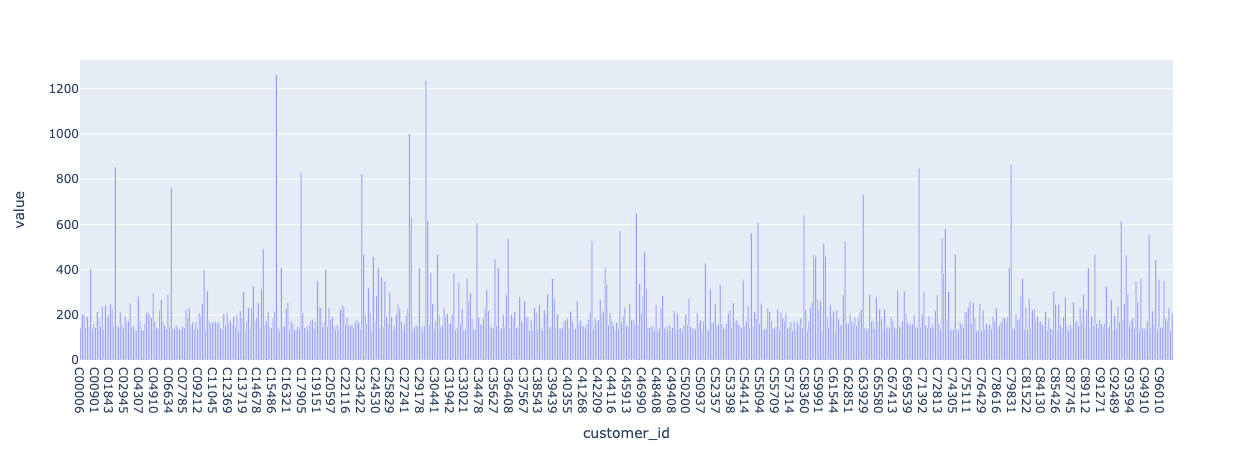

In [191]:
import plotly.express as px

fig = px.bar(ak, x='customer_id', y='value')
fig.show()